### Chapter-2

### Motif Hunting

#### Method:

* Motif Matrix
* SCORE(Motifs)
* COUNT(Motifs)
* PROFILE(Motifs)
* CONSENSUS(Motifs)

#### Algorithms: Median Strin problem

* Brute Force Motif Search( Median String)
* Greedy Motiff Search ( Laplace Rule)
* Randomized Motif Search( Gibbs Sampling)

### Methods: Motif Scoring

In [10]:
import random as random
import numpy as np

In [35]:
def DNA_generator(length):
        Genome = ['A','C','G','T']
        DNA = ""
        for i in range(length):
               DNA = DNA+random.choice(Genome)
        return DNA 

In [105]:
motif = ['ATTGTTCTACA','AATCTTGTTGA','TATGTTGGTCA','AATTTCGTACA','ATTGTCTGTCA']
motif

['ATTGTTCTACA', 'AATCTTGTTGA', 'TATGTTGGTCA', 'AATTTCGTACA', 'ATTGTCTGTCA']

In [106]:
Motif = []
for item in motif:
    letters = []
    for i in range(len(item)):
        letters.append(item[i])
    Motif.append(letters)

In [107]:
Motif

[['A', 'T', 'T', 'G', 'T', 'T', 'C', 'T', 'A', 'C', 'A'],
 ['A', 'A', 'T', 'C', 'T', 'T', 'G', 'T', 'T', 'G', 'A'],
 ['T', 'A', 'T', 'G', 'T', 'T', 'G', 'G', 'T', 'C', 'A'],
 ['A', 'A', 'T', 'T', 'T', 'C', 'G', 'T', 'A', 'C', 'A'],
 ['A', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'T', 'C', 'A']]

In [108]:
MTF = np.array(Motif)

In [109]:
MTF

array([['A', 'T', 'T', 'G', 'T', 'T', 'C', 'T', 'A', 'C', 'A'],
       ['A', 'A', 'T', 'C', 'T', 'T', 'G', 'T', 'T', 'G', 'A'],
       ['T', 'A', 'T', 'G', 'T', 'T', 'G', 'G', 'T', 'C', 'A'],
       ['A', 'A', 'T', 'T', 'T', 'C', 'G', 'T', 'A', 'C', 'A'],
       ['A', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'T', 'C', 'A']], 
      dtype='<U1')

In [110]:
MTF.shape

(5, 11)

In [111]:
 row,col = MTF.shape

In [112]:
row,col

(5, 11)

----------

In [113]:
MTF

array([['A', 'T', 'T', 'G', 'T', 'T', 'C', 'T', 'A', 'C', 'A'],
       ['A', 'A', 'T', 'C', 'T', 'T', 'G', 'T', 'T', 'G', 'A'],
       ['T', 'A', 'T', 'G', 'T', 'T', 'G', 'G', 'T', 'C', 'A'],
       ['A', 'A', 'T', 'T', 'T', 'C', 'G', 'T', 'A', 'C', 'A'],
       ['A', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'T', 'C', 'A']], 
      dtype='<U1')

In [114]:
MTF.transpose()

array([['A', 'A', 'T', 'A', 'A'],
       ['T', 'A', 'A', 'A', 'T'],
       ['T', 'T', 'T', 'T', 'T'],
       ['G', 'C', 'G', 'T', 'G'],
       ['T', 'T', 'T', 'T', 'T'],
       ['T', 'T', 'T', 'C', 'C'],
       ['C', 'G', 'G', 'G', 'T'],
       ['T', 'T', 'G', 'T', 'G'],
       ['A', 'T', 'T', 'A', 'T'],
       ['C', 'G', 'C', 'C', 'C'],
       ['A', 'A', 'A', 'A', 'A']], 
      dtype='<U1')

In [115]:
tMTF = MTF.transpose()

In [116]:
tMTF[1,:]

array(['T', 'A', 'A', 'A', 'T'], 
      dtype='<U1')

In [117]:
letters, counts = np.unique(tMTF[1,:], return_counts=True)

In [118]:
dict(zip(letters, counts))

{'A': 3, 'T': 2}

-------

In [124]:
tMTF = MTF.transpose()
rows,cols = tMTF.shape
count_dict = []
score_list = []

for row in range(rows):
    letters, counts = np.unique(tMTF[row,:], return_counts=True) 
    count_dict.append(dict(zip(letters, counts)))
#print(count_dict)
for item in count_dict:
    values = list(item.values())
    sm = sum(values)
    m =max(values)
    scr = sm-m
    score_list.append(scr)
    #print(values,sm,m,scr)



In [125]:
score_list

[1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0]

In [132]:
def SCORE(MTF, verbose=False):
    
    ''' take transpose of motif matrix '''
    tMTF = MTF.transpose()
     
    '''find row and cols'''
    rows,cols = tMTF.shape
    
    '''take an empty count dict'''
    count_dict = []
    
    '''take an empty score list'''
    score_list = []

    '''iterate over row of tMTF matrix'''
    for row in range(rows):
        
        '''find count of each letters'''
        letters, counts = np.unique(tMTF[row,:], return_counts=True) 
        '''add to count dict'''
        count_dict.append(dict(zip(letters, counts)))
        
        
    if verbose:
        print("count dict is:", count_dict)
        
        
    '''find score in each column'''    
    for item in count_dict:
        values = list(item.values())
        sm = sum(values)
        m =max(values)
        scr = sm-m
        score_list.append(scr)
        
        
        
        if verbose:
            print("values:",values,\
                  ", sum:", sm,\
                  ", max:", m,\
                  ", score:", scr)
        
        
    return sum(score_list),score_list

In [133]:
SCORE(MTF, verbose=True)

count dict is: [{'T': 1, 'A': 4}, {'T': 2, 'A': 3}, {'T': 5}, {'C': 1, 'T': 1, 'G': 3}, {'T': 5}, {'C': 2, 'T': 3}, {'C': 1, 'T': 1, 'G': 3}, {'T': 3, 'G': 2}, {'T': 3, 'A': 2}, {'C': 4, 'G': 1}, {'A': 5}]
values: [1, 4] , sum: 5 , max: 4 , score: 1
values: [2, 3] , sum: 5 , max: 3 , score: 2
values: [5] , sum: 5 , max: 5 , score: 0
values: [1, 1, 3] , sum: 5 , max: 3 , score: 2
values: [5] , sum: 5 , max: 5 , score: 0
values: [2, 3] , sum: 5 , max: 3 , score: 2
values: [1, 1, 3] , sum: 5 , max: 3 , score: 2
values: [3, 2] , sum: 5 , max: 3 , score: 2
values: [3, 2] , sum: 5 , max: 3 , score: 2
values: [4, 1] , sum: 5 , max: 4 , score: 1
values: [5] , sum: 5 , max: 5 , score: 0


(14, [1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0])

----

In [140]:
def COUNT(MTF, verbose=False):
    
    ''' take transpose of motif matrix '''
    tMTF = MTF.transpose()
     
    '''find row and cols'''
    rows,cols = tMTF.shape
    
    '''take an empty count dict'''
    count_dict = []
    
    '''take an empty score list'''
    score_list = []

    
    
    '''iterate over row of tMTF matrix'''
    for row in range(rows):
        
        '''set a current column'''
        current_col = tMTF[row,:]
        
        '''initiate a count dict for 4 symbols'''
        count = {"A": 0, "C":0, "G": 0 , "T": 0}
        
        
        '''iterate over each letters in that selected column'''
        for let in current_col:
            
            '''iterate over 4 symbols'''
            for sym in ["A", "C", "G", "T"]:
                
                '''when letter is same to symbol'''
                if let == sym:
                    
                    '''count that symbol'''
                    count[sym] += 1
                    
                    
        '''add count to count_dict'''    
        count_dict.append(count)    
            
        
        
        
    if verbose:
        print("count dict is:", count_dict)
        
        
    '''find score in each column'''    
    for item in count_dict:
        values = list(item.values())
        sm = sum(values)
        m =max(values)
        scr = sm-m
        score_list.append(scr)
        
        
        
        if verbose:
            print("values:",values,\
                  ", sum:", sm,\
                  ", max:", m,\
                  ", score:", scr)
        
        
    return sum(score_list),score_list

In [141]:
COUNT(MTF, verbose=True)

count dict is: [{'C': 0, 'T': 1, 'G': 0, 'A': 4}, {'C': 0, 'T': 2, 'G': 0, 'A': 3}, {'C': 0, 'T': 5, 'G': 0, 'A': 0}, {'C': 1, 'T': 1, 'G': 3, 'A': 0}, {'C': 0, 'T': 5, 'G': 0, 'A': 0}, {'C': 2, 'T': 3, 'G': 0, 'A': 0}, {'C': 1, 'T': 1, 'G': 3, 'A': 0}, {'C': 0, 'T': 3, 'G': 2, 'A': 0}, {'C': 0, 'T': 3, 'G': 0, 'A': 2}, {'C': 4, 'T': 0, 'G': 1, 'A': 0}, {'C': 0, 'T': 0, 'G': 0, 'A': 5}]
values: [0, 1, 0, 4] , sum: 5 , max: 4 , score: 1
values: [0, 2, 0, 3] , sum: 5 , max: 3 , score: 2
values: [0, 5, 0, 0] , sum: 5 , max: 5 , score: 0
values: [1, 1, 3, 0] , sum: 5 , max: 3 , score: 2
values: [0, 5, 0, 0] , sum: 5 , max: 5 , score: 0
values: [2, 3, 0, 0] , sum: 5 , max: 3 , score: 2
values: [1, 1, 3, 0] , sum: 5 , max: 3 , score: 2
values: [0, 3, 2, 0] , sum: 5 , max: 3 , score: 2
values: [0, 3, 0, 2] , sum: 5 , max: 3 , score: 2
values: [4, 0, 1, 0] , sum: 5 , max: 4 , score: 1
values: [0, 0, 0, 5] , sum: 5 , max: 5 , score: 0


(14, [1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0])

-------

In [156]:
def PROFILE(MTF, verbose=False):
    
    ''' take transpose of motif matrix '''
    tMTF = MTF.transpose()
     
    '''find row and cols'''
    rows,cols = tMTF.shape
    
    '''take an empty count list'''
    count_dict = []
    
    
    '''take an empty profile list'''
    profile = []
    
    '''take an empty score list'''
    score_list = []

    
    
    '''iterate over row of tMTF matrix'''
    for row in range(rows):
        
        '''set a current column'''
        current_col = tMTF[row,:]
        
        '''initiate a count dict for 4 symbols'''
        count = {"A": 0, "C":0, "G": 0 , "T": 0}
        
        
        '''iterate over each letters in that selected column'''
        for let in current_col:
            
            '''iterate over 4 symbols'''
            for sym in ["A", "C", "G", "T"]:
                
                '''when letter is same to symbol'''
                if let == sym:
                    
                    '''count that symbol'''
                    count[sym] += 1
                    
                    
        '''add count to count_dict'''    
        count_dict.append(count)    
            
    
        
    if verbose:
        print("count dict is:", count_dict)
        
        
    '''find score in each column'''    
    for item in count_dict:
        values = list(item.values())
        sm = sum(values)
        m =max(values)
        scr = sm-m
        score_list.append(scr)
        
        
        
        
        '''take an empty profile dict for each col'''
        profile_dict = {}
        
        '''convert item dict to profile dict for each col'''
        for key,value in item.items():
             profile_dict.update({key:value/sm})
        
        '''add profile dict to profile list'''
        profile.append(profile_dict)
        
        
        
        if verbose:
            print("values:",values,\
                  ", sum:", sm,\
                  ", max:", m,\
                  ", score:", scr)
        
        
    return sum(score_list),score_list,profile

In [158]:
PROFILE(MTF, verbose=True)

count dict is: [{'C': 0, 'T': 1, 'G': 0, 'A': 4}, {'C': 0, 'T': 2, 'G': 0, 'A': 3}, {'C': 0, 'T': 5, 'G': 0, 'A': 0}, {'C': 1, 'T': 1, 'G': 3, 'A': 0}, {'C': 0, 'T': 5, 'G': 0, 'A': 0}, {'C': 2, 'T': 3, 'G': 0, 'A': 0}, {'C': 1, 'T': 1, 'G': 3, 'A': 0}, {'C': 0, 'T': 3, 'G': 2, 'A': 0}, {'C': 0, 'T': 3, 'G': 0, 'A': 2}, {'C': 4, 'T': 0, 'G': 1, 'A': 0}, {'C': 0, 'T': 0, 'G': 0, 'A': 5}]
values: [0, 1, 0, 4] , sum: 5 , max: 4 , score: 1
values: [0, 2, 0, 3] , sum: 5 , max: 3 , score: 2
values: [0, 5, 0, 0] , sum: 5 , max: 5 , score: 0
values: [1, 1, 3, 0] , sum: 5 , max: 3 , score: 2
values: [0, 5, 0, 0] , sum: 5 , max: 5 , score: 0
values: [2, 3, 0, 0] , sum: 5 , max: 3 , score: 2
values: [1, 1, 3, 0] , sum: 5 , max: 3 , score: 2
values: [0, 3, 2, 0] , sum: 5 , max: 3 , score: 2
values: [0, 3, 0, 2] , sum: 5 , max: 3 , score: 2
values: [4, 0, 1, 0] , sum: 5 , max: 4 , score: 1
values: [0, 0, 0, 5] , sum: 5 , max: 5 , score: 0


(14,
 [1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0],
 [{'A': 0.8, 'C': 0.0, 'G': 0.0, 'T': 0.2},
  {'A': 0.6, 'C': 0.0, 'G': 0.0, 'T': 0.4},
  {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
  {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
  {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
  {'A': 0.0, 'C': 0.4, 'G': 0.0, 'T': 0.6},
  {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
  {'A': 0.0, 'C': 0.0, 'G': 0.4, 'T': 0.6},
  {'A': 0.4, 'C': 0.0, 'G': 0.0, 'T': 0.6},
  {'A': 0.0, 'C': 0.8, 'G': 0.2, 'T': 0.0},
  {'A': 1.0, 'C': 0.0, 'G': 0.0, 'T': 0.0}])

In [159]:
score,score_list,profile = PROFILE(MTF, verbose=False)

In [160]:
profile

[{'A': 0.8, 'C': 0.0, 'G': 0.0, 'T': 0.2},
 {'A': 0.6, 'C': 0.0, 'G': 0.0, 'T': 0.4},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.4, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.4, 'T': 0.6},
 {'A': 0.4, 'C': 0.0, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.8, 'G': 0.2, 'T': 0.0},
 {'A': 1.0, 'C': 0.0, 'G': 0.0, 'T': 0.0}]

In [162]:
import pandas as pd

In [169]:
%matplotlib inline

In [170]:
pd.DataFrame(profile)

,A,C,G,T
0,0.8,0.0,0.0,0.2
1,0.6,0.0,0.0,0.4
2,0.0,0.0,0.0,1.0
3,0.0,0.2,0.6,0.2
4,0.0,0.0,0.0,1.0
5,0.0,0.4,0.0,0.6
6,0.0,0.2,0.6,0.2
7,0.0,0.0,0.4,0.6
8,0.4,0.0,0.0,0.6
9,0.0,0.8,0.2,0.0


In [171]:
PRF = pd.DataFrame(profile)

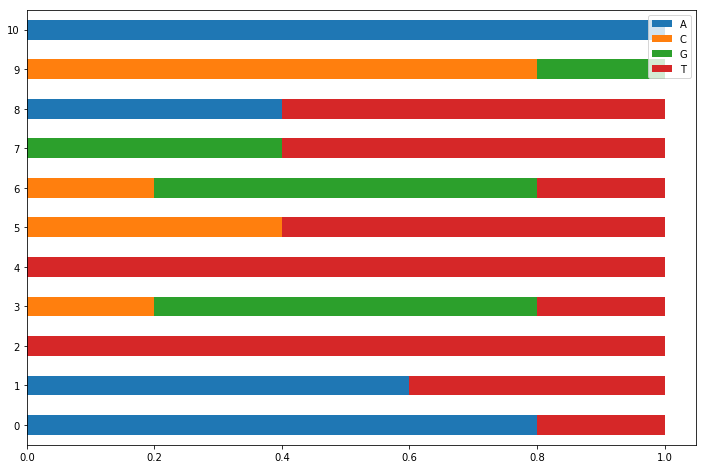

In [185]:
import matplotlib.pyplot as plt
PRF.plot.barh( stacked=True,figsize=(12, 8))

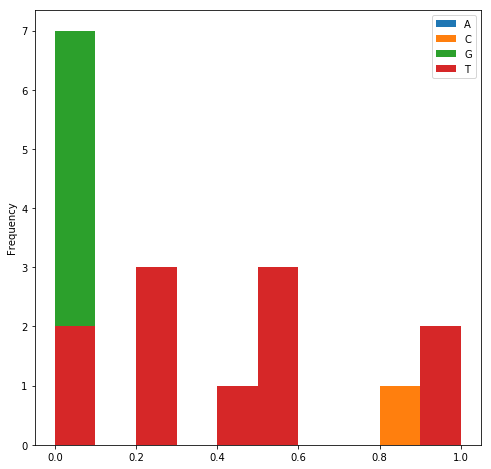

In [184]:
import matplotlib.pyplot as plt
PRF.plot.hist(figsize = [8,8])

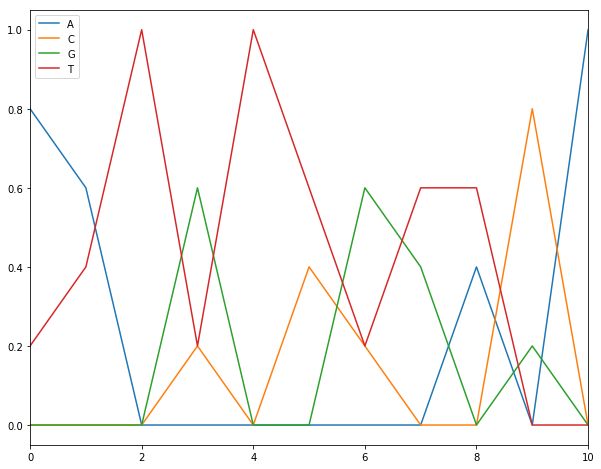

In [187]:
PRF.plot(figsize = [10,8])

### Score Class

In [80]:
class SCORE(object):
    
    def __init__(self,Motif):
        
        '''set Motif matrix'''
        self.MTF =Motif
        
        '''take an empty Count list'''
        self.Count_list = []
        
        '''take an empty Score list'''
        self.Score_list = []
        
        '''take an empty Profile list'''
        self.Profile_list = []
        
        '''initiate net score'''
        self.net_score = 0
       



    def count(self, verbose=False):
    
        ''' take transpose of motif matrix '''
        tMTF = self.MTF.transpose()
     
        '''find row and cols'''
        rows,cols = tMTF.shape
    
    
        '''iterate over row of tMTF matrix'''
        for row in range(rows):
        
            '''set a current column'''
            current_col = tMTF[row,:]
        
            '''initiate a count dict for 4 symbols'''
            count_dict = {"A": 0, "C":0, "G": 0 , "T": 0}
        
        
            '''iterate over each letters in that selected column'''
            for letter in current_col:
            
                '''iterate over 4 symbols'''
                for symbol in ["A", "C", "G", "T"]:
                
                    '''when letter is same to symbol'''
                    if letter == symbol:
                    
                        '''count that symbol'''
                        count_dict[symbol] += 1
                    
                    
            '''add  each count_dict to Count List'''    
            self.Count_list.append(count_dict) 
            
        if verbose:
            print("Count list is:", self.Count_list)
        
        
        
        
    def score(self, verbose =False): 
        
        '''iterate over items in Count list'''    
        for item in self.Count_list:
            
            '''find values of ecah letter count in choosed col'''
            values = list(item.values())
            
            '''sum the values'''
            value_sum = sum(values)
            
            '''what is majority count'''
            maximum =max(values)
            
            '''score is left over out of maximum'''
            score = value_sum-maximum
            
            '''add score of each col to Score List'''
            self.Score_list.append(score)
        
        
            if verbose:
                print("values:",values,\
                      ", sum:", value_sum,\
                      ", max:", maximum,\
                      ", score:", score)
        
        self.net_score = sum(self.Score_list) 
        
        if verbose:
            print("==================================")
            print("net score:",self.net_score,\
                  "Score list is:", self.Score_list)
        
        
        
        
        
        
    def profile(self,verbose =False):   
        
        '''iterate over items in Count list'''    
        for item in self.Count_list:
            
            '''take an empty profile dict for each col'''
            profile_dict = {}
            
            '''find values of ecah letter count in choosed col'''
            values = list(item.values())
            
            '''sum the values'''
            value_sum = sum(values)
            
            '''convert item dict to profile dict for each col'''
            for key,value in item.items():
                 profile_dict.update({key:value/value_sum})
        
            '''add profile dict to profile list'''
            self.Profile_list.append(profile_dict)
        
        
        if verbose:
            print("Profile list is:", self.Profile_list)
            
            
    def calculate(self, verbose = False):
        self.count(verbose)
        self.score(verbose)
        self.profile(verbose)
    
     
        
        

In [81]:
motif = ['ATTGTTCTACA','AATCTTGTTGA','TATGTTGGTCA','AATTTCGTACA','ATTGTCTGTCA']

In [82]:
Motif = []
for item in motif:
    letters = []
    for i in range(len(item)):
        letters.append(item[i])
    Motif.append(letters)
Motif =np.array(Motif)

In [83]:
Motif

array([['A', 'T', 'T', 'G', 'T', 'T', 'C', 'T', 'A', 'C', 'A'],
       ['A', 'A', 'T', 'C', 'T', 'T', 'G', 'T', 'T', 'G', 'A'],
       ['T', 'A', 'T', 'G', 'T', 'T', 'G', 'G', 'T', 'C', 'A'],
       ['A', 'A', 'T', 'T', 'T', 'C', 'G', 'T', 'A', 'C', 'A'],
       ['A', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'T', 'C', 'A']], 
      dtype='<U1')

In [84]:
S = SCORE(Motif)
S.count(verbose=True)

Count list is: [{'A': 4, 'G': 0, 'C': 0, 'T': 1}, {'A': 3, 'G': 0, 'C': 0, 'T': 2}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 0, 'C': 2, 'T': 3}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 2, 'C': 0, 'T': 3}, {'A': 2, 'G': 0, 'C': 0, 'T': 3}, {'A': 0, 'G': 1, 'C': 4, 'T': 0}, {'A': 5, 'G': 0, 'C': 0, 'T': 0}]


In [85]:
S.score(verbose=True)

values: [4, 0, 0, 1] , sum: 5 , max: 4 , score: 1
values: [3, 0, 0, 2] , sum: 5 , max: 3 , score: 2
values: [0, 0, 0, 5] , sum: 5 , max: 5 , score: 0
values: [0, 3, 1, 1] , sum: 5 , max: 3 , score: 2
values: [0, 0, 0, 5] , sum: 5 , max: 5 , score: 0
values: [0, 0, 2, 3] , sum: 5 , max: 3 , score: 2
values: [0, 3, 1, 1] , sum: 5 , max: 3 , score: 2
values: [0, 2, 0, 3] , sum: 5 , max: 3 , score: 2
values: [2, 0, 0, 3] , sum: 5 , max: 3 , score: 2
values: [0, 1, 4, 0] , sum: 5 , max: 4 , score: 1
values: [5, 0, 0, 0] , sum: 5 , max: 5 , score: 0
net score: 14 Score list is: [1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0]


In [86]:
S.profile(verbose = True)

Profile list is: [{'A': 0.8, 'G': 0.0, 'C': 0.0, 'T': 0.2}, {'A': 0.6, 'G': 0.0, 'C': 0.0, 'T': 0.4}, {'A': 0.0, 'G': 0.0, 'C': 0.0, 'T': 1.0}, {'A': 0.0, 'G': 0.6, 'C': 0.2, 'T': 0.2}, {'A': 0.0, 'G': 0.0, 'C': 0.0, 'T': 1.0}, {'A': 0.0, 'G': 0.0, 'C': 0.4, 'T': 0.6}, {'A': 0.0, 'G': 0.6, 'C': 0.2, 'T': 0.2}, {'A': 0.0, 'G': 0.4, 'C': 0.0, 'T': 0.6}, {'A': 0.4, 'G': 0.0, 'C': 0.0, 'T': 0.6}, {'A': 0.0, 'G': 0.2, 'C': 0.8, 'T': 0.0}, {'A': 1.0, 'G': 0.0, 'C': 0.0, 'T': 0.0}]


------------

In [88]:
S.calculate(verbose = True)

Count list is: [{'A': 4, 'G': 0, 'C': 0, 'T': 1}, {'A': 3, 'G': 0, 'C': 0, 'T': 2}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 0, 'C': 2, 'T': 3}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 2, 'C': 0, 'T': 3}, {'A': 2, 'G': 0, 'C': 0, 'T': 3}, {'A': 0, 'G': 1, 'C': 4, 'T': 0}, {'A': 5, 'G': 0, 'C': 0, 'T': 0}, {'A': 4, 'G': 0, 'C': 0, 'T': 1}, {'A': 3, 'G': 0, 'C': 0, 'T': 2}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 0, 'C': 0, 'T': 5}, {'A': 0, 'G': 0, 'C': 2, 'T': 3}, {'A': 0, 'G': 3, 'C': 1, 'T': 1}, {'A': 0, 'G': 2, 'C': 0, 'T': 3}, {'A': 2, 'G': 0, 'C': 0, 'T': 3}, {'A': 0, 'G': 1, 'C': 4, 'T': 0}, {'A': 5, 'G': 0, 'C': 0, 'T': 0}]
values: [4, 0, 0, 1] , sum: 5 , max: 4 , score: 1
values: [3, 0, 0, 2] , sum: 5 , max: 3 , score: 2
values: [0, 0, 0, 5] , sum: 5 , max: 5 , score: 0
values: [0, 3, 1, 1] , sum: 5 , max: 3 , score: 2
values: [0, 0, 0, 5] , sum: 5 , max:

In [89]:
S.Score_list

[1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0]

In [90]:
S.Profile_list

[{'A': 0.8, 'C': 0.0, 'G': 0.0, 'T': 0.2},
 {'A': 0.6, 'C': 0.0, 'G': 0.0, 'T': 0.4},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.4, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.4, 'T': 0.6},
 {'A': 0.4, 'C': 0.0, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.8, 'G': 0.2, 'T': 0.0},
 {'A': 1.0, 'C': 0.0, 'G': 0.0, 'T': 0.0},
 {'A': 0.8, 'C': 0.0, 'G': 0.0, 'T': 0.2},
 {'A': 0.6, 'C': 0.0, 'G': 0.0, 'T': 0.4},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 1.0},
 {'A': 0.0, 'C': 0.4, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.2, 'G': 0.6, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 0.4, 'T': 0.6},
 {'A': 0.4, 'C': 0.0, 'G': 0.0, 'T': 0.6},
 {'A': 0.0, 'C': 0.8, 'G': 0.2, 'T': 0.0},
 {'A': 1.0, 'C': 0.0, 'G': 0.0, 'T': 0.0},
 {'A': 0.8, 'C': 0.0, 'G': 0.0, 'T': 0.2},
 {'A': 0.6,

In [91]:
S.Count_list

[{'A': 4, 'C': 0, 'G': 0, 'T': 1},
 {'A': 3, 'C': 0, 'G': 0, 'T': 2},
 {'A': 0, 'C': 0, 'G': 0, 'T': 5},
 {'A': 0, 'C': 1, 'G': 3, 'T': 1},
 {'A': 0, 'C': 0, 'G': 0, 'T': 5},
 {'A': 0, 'C': 2, 'G': 0, 'T': 3},
 {'A': 0, 'C': 1, 'G': 3, 'T': 1},
 {'A': 0, 'C': 0, 'G': 2, 'T': 3},
 {'A': 2, 'C': 0, 'G': 0, 'T': 3},
 {'A': 0, 'C': 4, 'G': 1, 'T': 0},
 {'A': 5, 'C': 0, 'G': 0, 'T': 0},
 {'A': 4, 'C': 0, 'G': 0, 'T': 1},
 {'A': 3, 'C': 0, 'G': 0, 'T': 2},
 {'A': 0, 'C': 0, 'G': 0, 'T': 5},
 {'A': 0, 'C': 1, 'G': 3, 'T': 1},
 {'A': 0, 'C': 0, 'G': 0, 'T': 5},
 {'A': 0, 'C': 2, 'G': 0, 'T': 3},
 {'A': 0, 'C': 1, 'G': 3, 'T': 1},
 {'A': 0, 'C': 0, 'G': 2, 'T': 3},
 {'A': 2, 'C': 0, 'G': 0, 'T': 3},
 {'A': 0, 'C': 4, 'G': 1, 'T': 0},
 {'A': 5, 'C': 0, 'G': 0, 'T': 0}]

In [92]:
S.net_score

42